## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ugs-applications/

/content/drive/MyDrive/ugs-applications


In [3]:
!pip3 install transformer_lens
!pip3 install seaborn
!pip3 install fancy_einsum
!pip3 install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.6 MB/s eta 0:00:00
  Using cached nvidi

## Imports

In [37]:
from evaluators.mcms_evaluator import run_MCMS,run_MCMS_KQV
import pickle
from tqdm import tqdm
import pandas as pd

from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import sys

In [36]:
del sys.modules["evaluators.mcms_evaluator"]

## Sweep over K

In [49]:
results = {}
for k in tqdm(range(1,300,3)):
  head_losses, head_vars, n_batches_by_head, n_samples_by_head = run_MCMS_KQV( k =k,max_batches = 10000)
  results[k] = {"head_losses" : head_losses,
                "head_vars" : head_vars,
                "n_batches_by_head": n_batches_by_head,
                "n_samples_by_head": n_samples_by_head,
                }


  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 1
---------------------------
Dataset Config
---------------------


  1%|          | 1/100 [00:33<54:35, 33.09s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 4
----------------


  2%|▏         | 2/100 [01:06<54:03, 33.10s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 7
----------------


  3%|▎         | 3/100 [01:38<53:07, 32.86s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 10
---------------


  4%|▍         | 4/100 [02:11<52:16, 32.67s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 13
---------------


  5%|▌         | 5/100 [02:44<51:51, 32.76s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 16
---------------


  6%|▌         | 6/100 [03:16<51:06, 32.63s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 19
---------------


  7%|▋         | 7/100 [03:49<50:51, 32.81s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 22
---------------


  8%|▊         | 8/100 [04:22<50:09, 32.71s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 25
---------------


  9%|▉         | 9/100 [04:55<49:48, 32.84s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 28
---------------


 10%|█         | 10/100 [05:27<49:11, 32.80s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 31
---------------


 11%|█         | 11/100 [06:01<48:56, 32.99s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 34
---------------


 12%|█▏        | 12/100 [06:34<48:21, 32.98s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 37
---------------


 13%|█▎        | 13/100 [07:07<47:45, 32.93s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 40
---------------


 14%|█▍        | 14/100 [07:40<47:16, 32.99s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 43
---------------


 15%|█▌        | 15/100 [08:13<46:39, 32.93s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 46
---------------


 16%|█▌        | 16/100 [08:46<46:19, 33.09s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 49
---------------


 17%|█▋        | 17/100 [09:19<45:45, 33.08s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 52
---------------


 18%|█▊        | 18/100 [09:53<45:29, 33.28s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 55
---------------


 19%|█▉        | 19/100 [10:26<44:47, 33.18s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 58
---------------


 20%|██        | 20/100 [11:00<44:33, 33.42s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 61
---------------


 21%|██        | 21/100 [11:33<43:46, 33.24s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 64
---------------


 22%|██▏       | 22/100 [12:06<43:23, 33.38s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 67
---------------


 23%|██▎       | 23/100 [12:39<42:39, 33.24s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 70
---------------


 24%|██▍       | 24/100 [13:12<41:57, 33.13s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 73
---------------


 25%|██▌       | 25/100 [13:45<41:27, 33.17s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 76
---------------


 26%|██▌       | 26/100 [14:18<40:45, 33.04s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 79
---------------


 27%|██▋       | 27/100 [14:52<40:25, 33.22s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 82
---------------


 28%|██▊       | 28/100 [15:25<39:42, 33.09s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 85
---------------


 29%|██▉       | 29/100 [15:58<39:20, 33.24s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 88
---------------


 30%|███       | 30/100 [16:31<38:38, 33.13s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 91
---------------


 31%|███       | 31/100 [17:05<38:16, 33.28s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 94
---------------


 32%|███▏      | 32/100 [17:37<37:28, 33.06s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 97
---------------


 33%|███▎      | 33/100 [18:10<37:00, 33.14s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 100
--------------


 34%|███▍      | 34/100 [18:43<36:19, 33.02s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 103
--------------


 35%|███▌      | 35/100 [19:16<35:44, 32.99s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 106
--------------


 36%|███▌      | 36/100 [19:49<35:10, 32.98s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 109
--------------


 37%|███▋      | 37/100 [20:22<34:32, 32.90s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 112
--------------


 38%|███▊      | 38/100 [20:55<34:10, 33.07s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 115
--------------


 39%|███▉      | 39/100 [21:28<33:28, 32.93s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 118
--------------


 40%|████      | 40/100 [22:01<33:05, 33.09s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 121
--------------


 41%|████      | 41/100 [22:34<32:28, 33.02s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 124
--------------


 42%|████▏     | 42/100 [23:08<32:09, 33.26s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 127
--------------


 43%|████▎     | 43/100 [23:41<31:30, 33.17s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 130
--------------


 44%|████▍     | 44/100 [24:14<30:52, 33.07s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 133
--------------


 45%|████▌     | 45/100 [24:47<30:24, 33.17s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 136
--------------


 46%|████▌     | 46/100 [25:20<29:46, 33.08s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 139
--------------


 47%|████▋     | 47/100 [25:54<29:24, 33.30s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk
Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 142
--------------


 48%|████▊     | 48/100 [26:27<28:45, 33.19s/it]

---------------------------
Finished Evaluation
Loading model...
Loaded pretrained model gpt2-small into HookedTransformer
Loading OWT...
Loading OWT data from disk


 48%|████▊     | 48/100 [26:29<28:41, 33.11s/it]

Making DataLoader
---------------------------
Pruning Config
---------------------------
device : cuda:0
n_layers : 12
n_heads : 12
folder : results/mcms
lamb : None
record_every : 100
checkpoint_every : 5
starting_beta : 0.6666666666666666
hard_concrete_endpoints : (-0.1, 1.1)
layers_to_prune : [('attn', 0), ('mlp', 0), ('attn', 1), ('mlp', 1), ('attn', 2), ('mlp', 2), ('attn', 3), ('mlp', 3), ('attn', 4), ('mlp', 4), ('attn', 5), ('mlp', 5), ('attn', 6), ('mlp', 6), ('attn', 7), ('mlp', 7), ('attn', 8), ('mlp', 8), ('attn', 9), ('mlp', 9), ('attn', 10), ('mlp', 10), ('attn', 11), ('mlp', 11), ('mlp', 12)]
temp_min_reg : 0.001
temp_adj_intv : 10
temp_avg_intv : 20
temp_comp_intv : 200
temp_convergence_target : 2000
temp_c : 0
temp_momentum : 0
batch_size : 100
n_samples : 1
lr : 0.01
lr_modes : 0.002
k : 145
---------------------------
Dataset Config
---------------------------
ds_name : ioi
batch_size : 100
device : cuda:0
ablation_type : mean_agnostic
means : None
ds : <list_iterato

RuntimeError: selected index k out of range

In [50]:
with open("atp/ioi/sweep_results_KQV_10000.pkl", "wb") as f:
  pickle.dump(results, f)

In [ ]:
with open("atp/ioi/sweep_results_10000.pkl", "rb") as f:
  results = pickle.load(f)

In [51]:
single_component_head_losses = pickle.load(open("atp/ioi/single_component_kqv_losses.pickle", "rb"))
single_component_head_vars = pickle.load(open("atp/ioi/single_component_kqv_vars.pickle", "rb"))

In [42]:
single_component_head_losses.shape

torch.Size([432, 1])

In [52]:
spearman_corrs = {}

spearman_corrs["k"] = list(results.keys())

for top_k in tqdm(range(10,150,10)):
  _, idx = single_component_head_losses.topk(top_k,0)
  single_component_head_losses[idx.squeeze()].shape
  spearman_corrs[top_k] = []
  for key,val in results.items():
    spearman_corrs[top_k].append(round(spearmanr(val["head_losses"][idx].flatten().cpu() , single_component_head_losses[idx].flatten().cpu())[0],4))




df = pd.DataFrame(spearman_corrs)
df.style.highlight_max(color = 'yellow', axis = 0)

100%|██████████| 14/14 [00:00<00:00, 27.88it/s]


,k,10,20,30,40,50,60,70,80,90,100,110,120,130,140
0,1,0.151500,0.332300,0.338800,0.369000,0.283300,0.197300,0.167800,0.117700,0.086200,0.125600,0.142100,0.183000,0.206200,0.219400
1,4,-0.527300,-0.088700,0.003800,0.120100,0.012000,-0.010100,-0.108800,-0.151500,-0.070600,0.018200,-0.018100,0.047000,0.084600,0.126700
2,7,-0.309100,0.012000,-0.160000,-0.077100,-0.057000,-0.147400,-0.196300,-0.188800,-0.187400,-0.086500,-0.063400,-0.043800,-0.025100,0.043500
3,10,-0.272700,-0.033100,-0.043800,0.122300,0.053700,-0.037000,0.017400,-0.040000,-0.021200,0.075600,0.066000,0.067300,0.047000,0.071100
4,13,-0.684800,-0.118800,-0.111500,-0.064900,-0.107600,-0.077600,-0.103900,-0.168100,-0.155800,-0.103900,-0.095900,-0.069800,-0.015500,0.040700
5,16,-0.212100,-0.007500,-0.013100,0.022100,-0.050400,-0.036700,-0.049300,-0.144500,-0.142800,0.023500,0.078000,0.122600,0.141200,0.193200
6,19,-0.527300,-0.042100,0.010000,0.152900,0.121200,0.090900,0.029200,-0.020300,-0.096000,0.037600,0.084100,0.050400,0.077900,0.098100
7,22,-0.321200,0.102300,-0.030500,-0.008600,-0.002500,-0.119500,-0.143000,-0.203500,-0.124100,-0.004800,-0.015000,-0.020800,0.057100,0.037200
8,25,-0.442400,0.329300,0.150200,0.072400,0.068800,0.021400,-0.026100,-0.016700,-0.030400,0.118200,0.126500,0.093500,0.132000,0.148200
9,28,0.139400,0.296200,0.210200,0.119500,0.157100,0.029200,-0.018400,-0.014900,-0.012800,0.111800,0.095200,0.085200,0.122400,0.152100


In [ ]:

for k, result in results.items():
  r, _ = spearmanr(single_component_head_losses[:144].cpu().squeeze(), result["head_losses"].cpu().squeeze())
  print(f"Spearman corr for k={k}: {r**2}")


Spearman corr for k=1: 0.7923375228272206
Spearman corr for k=2: 0.7159899340916778
Spearman corr for k=4: 0.7965716738750008
Spearman corr for k=6: 0.7028560127166515
Spearman corr for k=8: 0.7461662982885847
Spearman corr for k=10: 0.7531954530714124
Spearman corr for k=12: 0.6698227139372172
Spearman corr for k=14: 0.7424562850568359
Spearman corr for k=16: 0.6213991104486936
Spearman corr for k=18: 0.5901650533868464
Spearman corr for k=20: 0.6859503628931466
Spearman corr for k=22: 0.5486545060485507
Spearman corr for k=24: 0.5510624772186516
Spearman corr for k=28: 0.5353755151531692
Spearman corr for k=32: 0.4981414087046118
Spearman corr for k=36: 0.39436905857733556
Spearman corr for k=40: 0.27798262447090427
Spearman corr for k=48: 0.2214844387831924
Spearman corr for k=64: 0.20384052808025682
Spearman corr for k=96: 0.20015572709038285


In [53]:
for k, result in results.items():
  biases = (result["head_losses"]  - single_component_head_losses)
  vars = result["head_vars"]/ result["n_samples_by_head"]
  result["mse"] = (biases**2 + vars).mean().item()
  result["estimator bias"] = (result["head_losses"] - single_component_head_losses).abs().mean().item()
  result["estimator variance"] = (result["head_vars"]/ result["n_samples_by_head"]).mean().item()
  result["estimator std"] = result["estimator variance"]**0.5
  result["spearman"] = spearmanr(single_component_head_losses.cpu().squeeze(), result["head_losses"].cpu().squeeze() )[0]


df = pd.DataFrame({"k": [k for k in results.keys()],
                   "estimator bias": [result["estimator bias"] for result in results.values()],
                   "estimator var": [result["estimator variance"] for result in results.values()],
                   "estimator std": [result["estimator std"] for result in results.values()],
                   "spearmanr":[result["spearman"] for result in results.values()],
                   "mse": [result["mse"] for result in results.values()]})

df["mae"] = df["mse"] ** 0.5
df

,k,estimator bias,estimator var,estimator std,spearmanr,mse,mae
0,1,0.029601,0.011481,0.107148,0.585427,0.044272,0.210408
1,4,0.031803,0.002055,0.045334,0.576187,0.043200,0.207846
2,7,0.032714,0.001842,0.042913,0.534078,0.039549,0.198868
3,10,0.037726,0.001158,0.034033,0.516460,0.043049,0.207482
4,13,0.042916,0.000915,0.030242,0.519349,0.049509,0.222505
5,16,0.043787,0.000730,0.027011,0.511078,0.044467,0.210872
6,19,0.048293,0.000794,0.028172,0.494400,0.044588,0.211159
7,22,0.051415,0.000639,0.025285,0.485351,0.043962,0.209672
8,25,0.056963,0.000652,0.025531,0.454956,0.048950,0.221246
9,28,0.059168,0.000649,0.025471,0.457627,0.042674,0.206578


<Axes: xlabel='k'>

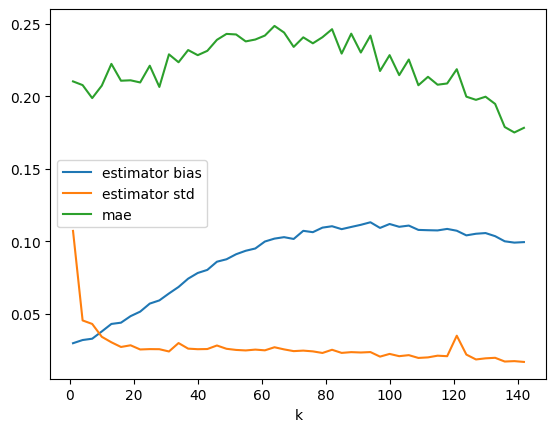

In [54]:
df[df["k"]> 0].plot(x = "k", y = [ "estimator bias", "estimator std", "mae"])

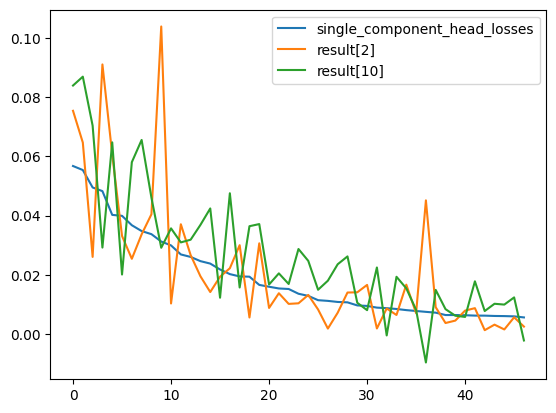

In [ ]:
# prompt: plot single_component_head_losses from lowest to highest as well as result[6] on the same plot for same indices

import matplotlib.pyplot as plt

_, idx = single_component_head_losses[:144].topk(50,0)
idx = idx[3:]

plt.plot(single_component_head_losses[idx].flatten().cpu() , label="single_component_head_losses")
plt.plot(results[1]["head_losses"][idx].flatten().cpu() * (-1), label="result[2]")
# plt.plot(results[6]["head_losses"][idx].flatten().cpu() * (-1), label="result[6]")
# plt.plot(results[8]["head_losses"][idx].flatten().cpu() * (-1), label="result[6]")
plt.plot(results[16]["head_losses"][idx].flatten().cpu() * (-1), label="result[10]")

plt.legend()
plt.show()


In [ ]:
idx.shape

torch.Size([50, 1])

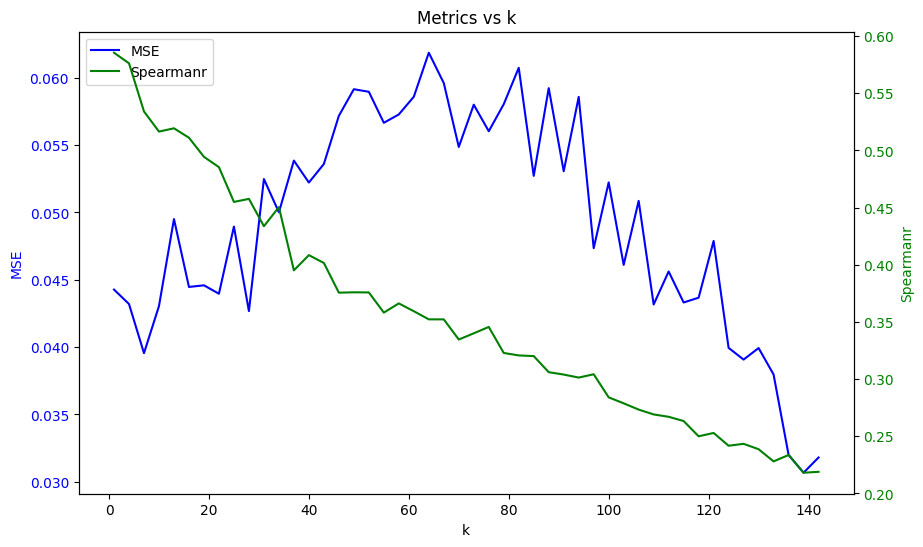

In [56]:

df_filtered = df

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.plot(df_filtered['k'], df_filtered['mse'], 'b-', label='MSE')
ax1.set_xlabel('k')
ax1.set_ylabel('MSE', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for spearmanr
ax2 = ax1.twinx()
ax2.plot(df_filtered['k'], df_filtered['spearmanr'], 'g-', label='Spearmanr')
ax2.set_ylabel('Spearmanr', color='g')
ax2.tick_params(axis='y', labelcolor='g')


# Adding legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2,  loc='upper left')

plt.title('Metrics vs k')
plt.show()


In [ ]:
result["head_losses"].cpu().squeeze() * (-1)

tensor([ 1.6290e-02, -1.8365e-01,  2.7563e-02,  2.0450e-01, -4.0196e-02,
         2.0890e-02, -3.8856e-02,  3.4075e-02,  7.7159e-02,  2.5721e-01,
         1.2737e-01, -4.5210e-02,  1.2918e-02,  8.6590e-02, -5.0319e-02,
         7.2812e-02,  7.6923e-03,  3.9969e-03,  1.7138e-02,  9.0571e-02,
         1.3567e-01, -5.1751e-02, -1.1998e-02,  6.4741e-03,  2.4486e-02,
         4.7862e-02,  3.9748e-02, -7.3589e-03, -2.1218e-02,  4.2705e-02,
         4.9416e-03, -9.3264e-03,  6.1609e-02,  5.4479e-02, -3.3396e-02,
         5.9146e-02,  4.4446e-02,  5.2902e-03,  4.5845e-02, -1.9467e-02,
         2.1532e-02,  4.8266e-02,  2.9967e-02,  1.2000e-01,  6.0355e-02,
        -3.6064e-02, -6.1975e-03, -3.1118e-02,  6.2243e-02, -1.4978e-02,
         9.5767e-03,  1.2083e-01,  1.1040e-02,  6.4986e-03,  5.4722e-02,
        -2.3100e-02,  3.0022e-02, -4.1767e-03,  5.1899e-03,  1.0579e-01,
         3.2370e-02, -9.1098e-04,  5.4734e-02, -3.8530e-03,  3.6172e-02,
         1.3637e-01, -9.1352e-03, -2.1725e-02,  8.0